In [3]:
# removes the need to call plt.show() every time
%matplotlib inline

In [26]:
import missingno as msno
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

In [4]:
#First we load the 'elsec15' dataset.
#The original dataset consisted of 2 separate sheets. The second sheet provided no useful data to process. 
#It had three rows and 3 columns describing the date that the file was created. Therefore, we deleted the sheet. 
school = pd.read_csv("elsec15.csv")
school

/home/porrster/home/porrster/Documents/anaconda2/envs/universe/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,0100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,0100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,0101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,0100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400
5,1,1500500100000,BLOUNT COUNTY SCHOOL DISTRICT,1009,142,13820,3,0100420,15,8082,...,0,11123,0,980,10143,0,0,843,947,22610
6,1,1500500200000,ONEONTA CITY SCHOOL DISTRICT,1009,142,13820,3,0102550,15,1485,...,0,2598,0,248,2350,0,0,2190,814,1965
7,1,1500600100000,BULLOCK COUNTY SCHOOL DISTRICT,1011,N,N,3,0100480,15,1519,...,0,4150,0,334,3816,0,0,324,0,1177
8,1,1500700100000,BUTLER COUNTY SCHOOL DISTRICT,1013,N,N,3,0100510,15,3191,...,0,28128,31858,32248,27738,0,0,522,3845,3456
9,1,1500800200000,ANNISTON CITY SCHOOL DISTRICT,1015,N,11500,3,0100090,15,2141,...,0,2448,0,51,2397,0,0,1652,673,0


In [5]:
school.describe()

,STATE,IDCENSUS,CONUM,SCHLEV,YRDATA,V33,TOTALREV,TFEDREV,C14,C15,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
count,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.0,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,...,14376.000000,1.437600e+04,1.437600e+04,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.000000,14376.000000,1.437600e+04
mean,26.801336,2.728090e+13,29838.158598,2.883139,15.0,3374.682526,4.546951e+04,3.708038e+03,915.914858,752.781093,...,7.318656,2.871850e+04,4.831726e+03,3936.853158,2.957606e+04,487.162354,553.761547,1335.636825,3710.651920,9.091542e+03
std,13.894331,1.389514e+13,14753.492121,1.271649,0.0,14419.737037,2.590623e+05,2.021328e+04,5972.748111,3619.184513,...,122.649299,1.841763e+05,2.652979e+04,20071.591744,1.894224e+05,3555.988118,6968.740454,10651.097318,20183.852905,3.261580e+04
min,1.000000,1.500100e+12,1001.000000,1.000000,15.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,15.000000,1.550327e+13,18063.000000,3.000000,15.0,305.000000,5.241500e+03,2.920000e+02,54.000000,0.000000,...,0.000000,8.400000e+01,0.000000e+00,5.000000,7.150000e+01,0.000000,0.000000,0.000000,0.000000,8.350000e+02
50%,27.000000,2.750320e+13,30063.000000,3.000000,15.0,979.500000,1.402300e+04,8.470000e+02,180.000000,118.000000,...,0.000000,4.034000e+03,0.000000e+00,410.000000,4.143500e+03,0.000000,0.000000,0.000000,0.000000,2.708500e+03
75%,38.000000,3.850053e+13,41009.000000,3.000000,15.0,2744.250000,3.791375e+04,2.433500e+03,545.250000,532.000000,...,0.000000,1.866350e+04,3.030000e+02,1845.000000,1.912600e+04,0.000000,0.000000,491.000000,626.250000,7.567500e+03
max,51.000000,5.150230e+13,56045.000000,7.000000,15.0,995192.000000,2.543738e+07,1.307783e+06,379531.000000,248209.000000,...,7753.000000,1.372802e+07,1.312286e+06,731854.000000,1.447108e+07,173300.000000,700000.000000,869643.000000,885058.000000,2.355662e+06


In [5]:
#Now that we have an overview of our dataset, we will move on by cleaning it.
school_clean = school[['STATE', 'IDCENSUS', 'NAME', 'SCHLEV', 'NCESID', 'YRDATA', 'TOTALREV', 'TFEDREV', 'TSTREV',
                       'TLOCREV', 'TOTALEXP', 'TCURELSC', 'TCURINST', 'TCURSSVC', 'TCUROTH', 'NONELSEC', 'TCAPOUT']]
school_clean.head()

,STATE,IDCENSUS,NAME,SCHLEV,NCESID,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURELSC,TCURINST,TCURSSVC,TCUROTH,NONELSEC,TCAPOUT
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,3,0100240,15,79665,7574,53244,18847,76069,72872,44085,23217,5570,1010,691
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,3,0100270,15,330317,23602,143282,163433,297083,269928,155668,99682,14578,4957,13256
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,3,0100300,15,10519,2518,5632,2369,10314,9957,5249,3835,873,145,0
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,3,0101410,15,26076,3374,16048,6654,25602,24232,14887,7494,1851,333,990
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,3,0100360,15,31825,3586,21687,6552,31293,29133,16019,10822,2292,658,858


In [6]:
#We now check for any columns with missing values:
[col for col in school_clean.columns if school_clean[col].isnull().any()]
print(school_clean.shape)

(14376, 17)


In [22]:
#Since the code above returned an empty list, 
#we now know that the school_clean dataframe has no columns with missing values.
# In other words, we have a complete dataframe.
#Now we will incorportate linear regression to see if we can derive useful info

#lets try to predict elementary secondary programs since they 
# are designed to assist less fortunate citizens
secondarySpending = school_clean['TCURELSC']
myReg = LinearRegression()
myRFE = RFECV(myReg, step = 1, cv = 5)
#For variables included: categorical data was remvoed because it is not
# meant for linear regression. TCURSSVC, TCURINST, and TCUROTH were removed
# because TCURELSC is dependent on them, which would inhibit
# independence of variables. TOTALEXP was removed because it is dependent on TCURELSC.
# TOTALREV was removed because it is the sum of three other variables in
# the set, which would be redundant, plus having the three other variables
# is good because then we can break results down to the source of the funding too.
myRFE = myRFE.fit(school_clean[['TFEDREV', 'TSTREV',
                       'TLOCREV', 'NONELSEC', 'TCAPOUT']], secondarySpending)
print(myRFE.support_)
print(myRFE.ranking_)
print(school_clean.columns)

[ True  True  True  True False]
[1 1 1 1 2]
Index(['STATE', 'IDCENSUS', 'NAME', 'SCHLEV', 'NCESID', 'YRDATA', 'TOTALREV',
       'TFEDREV', 'TSTREV', 'TLOCREV', 'TOTALEXP', 'TCURELSC', 'TCURINST',
       'TCURSSVC', 'TCUROTH', 'NONELSEC', 'TCAPOUT'],
      dtype='object')


In [45]:
#Since capital expenditures dont seem to be very useful, we'll
# just not use it in testing and validation.
half = school_clean.shape[0] // 2

test_dat = school_clean[0:half]
val_dat = school_clean[half:]

ss_test = secondarySpending[0:half]
ss_val = secondarySpending[half:]

test_vars = test_dat['TFEDREV']#, 'TSTREV']]
                #,'TLOCREV', 'NONELSEC', 'TCAPOUT']]
val_vars = val_dat['TFEDREV']#, 'TSTREV']]
                #,'TLOCREV', 'NONELSEC', 'TCAPOUT']]

sm.add_constant(test_vars)
sm.add_constant(val_vars)

myOLS = sm.OLS(ss_test, test_vars).fit()
ss_hat = myOLS.predict(val_vars)
ss_hat = np.ones(50)
ss_val = np.zeros(50)
mse = 1/len(ss_hat) * np.dot((ss_val - ss_hat), (ss_val - ss_hat))
print("MSE is: ", mse, np.dot((ss_hat), (ss_hat)))


MSE is:  1.0 50.0


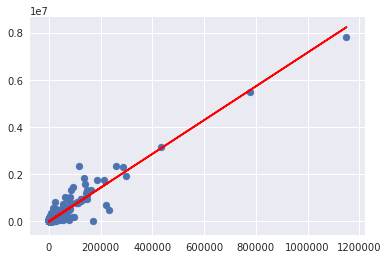

In [27]:
plt.figure(1)
plt.plot(test_dat['TFEDREV'], myOLS.predict(test_dat['TFEDREV']), color='red')
plt.scatter(test_dat['TFEDREV'], ss_test)